In [8]:

import matplotlib.pyplot as plt
import np as np
import numpy as np
import pandas as pd
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV

You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values.ravel()
# images = pd.read_csv("../dataset/raw_images.csv").values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
# y_train = y_train.ravel()

scaler_standard = StandardScaler().fit(X)
X_standard = scaler_standard.transform(X)

scaler_robust = RobustScaler().fit(X)
X_robust = scaler_robust.transform(X)

scaler_minmax = MinMaxScaler().fit(X)
X_minmax = scaler_minmax.transform(X)

In [5]:
for i in range(9):
    print(np.count_nonzero(y==i))

325
99
133
154
281
283
325
318
301


In [7]:
cov_mat = np.cov(X_standard)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis], eigen_pairs[1][1][:,np.newaxis]))
# X_train_pca = X_standard.dot(w)


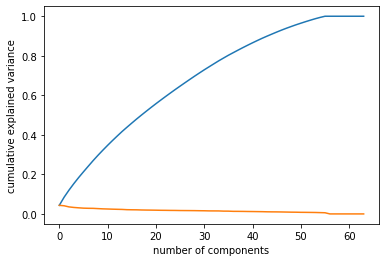

In [15]:
pca = PCA().fit(X_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
print(np.cumsum(pca.explained_variance_ratio_))


[0.04338011 0.08459697 0.1201401  0.152902   0.18377525 0.21291863
 0.24136254 0.26952431 0.29638626 0.32200598 0.34686823 0.37090071
 0.39423103 0.41695952 0.43837441 0.4593361  0.4800117  0.49994058
 0.51943125 0.53863351 0.55745096 0.57579919 0.5939309  0.61168195
 0.62927061 0.64640525 0.66336946 0.68018174 0.69677707 0.7129604
 0.72888815 0.74420068 0.75939943 0.77446652 0.78861554 0.80261667
 0.81564441 0.82857351 0.84128651 0.85357079 0.86560303 0.8772555
 0.88861634 0.89931782 0.90970236 0.91993661 0.9298159  0.93920997
 0.94810265 0.95674873 0.96482903 0.97272743 0.98029767 0.98756503
 0.9941357  1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
56 features = 100

